In [58]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from typing import Dict, Optional

In [59]:
import matplotlib.pyplot as plt
def show_scatter(data: np.ndarray, color: np.ndarray):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_facecolor('white')
    ff = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=color)
    plt.colorbar(ff)
    plt.show()
    
def plot_scatter(
    data: np.ndarray,
    color_dict: Dict[str, np.ndarray] = {},
    color: Optional[str] = None,
):

    import pandas as pd
    import plotly.express as px

    df_dict = color_dict.copy()

    dim = data.shape[1]
    assert dim in [2, 3]
    for i, name in zip(range(dim), ["x", "y", "z"]):
        df_dict[name] = data[:, i]

    df = pd.DataFrame(df_dict)
    scatter_kwargs = dict(
        x="x",
        y="y",
        color=color,
        width=1000,
        height=1000,
        size_max=7,
        hover_data=list(df_dict.keys()),
    )
    if dim == 2:
        fig = px.scatter(df, **scatter_kwargs)
    else:  # dim == 3
        fig = px.scatter_3d(df, z="z", **scatter_kwargs)
    return fig

In [60]:
df = pd.read_csv("../data/drugs.input.csv")
inhibition = pd.read_csv("../data/mmc1.txt", delimiter="\t", skiprows=0, header=1)["Mean_Inhibition"].values

In [61]:
df

,Value,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0.041572,33.026139,25.421857,3,0,53.330485,2.575217,5.150104,53.330485,1.269773,...,10.873376,93.474134,612.120937,9.274560,6507,69,226.0,271.0,14.888889,9.083333
1,0.041876,25.458010,21.532499,2,1,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.518700,88.905373,485.138047,8.511194,14000001969,50,174.0,205.0,13.895833,7.166667
2,0.041916,65.759020,51.346874,2,5,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.012891,130.082085,1300.717307,6.845881,42500042307,131,418.0,462.0,39.701389,20.833333
3,0.041964,5.835194,6.019630,0,2,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.384119,49.703786,146.035924,9.127245,800000062,6,36.0,39.0,0.000000,1.861111
4,0.042295,25.405076,18.184613,0,10,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.890453,70.951274,576.156552,8.472890,6900005239,41,158.0,170.0,0.000000,7.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,1.235350,22.842374,20.203561,0,0,34.384177,2.752430,5.504859,34.384177,1.185661,...,11.065278,66.344588,410.230453,6.511594,1698,71,170.0,219.0,14.479167,5.972222
2331,1.251650,33.598660,24.914663,3,3,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.897905,83.057680,694.969090,11.392936,12900006025,75,234.0,278.0,0.000000,8.611111
2332,1.273150,13.141320,11.243837,0,0,21.019314,2.419870,4.839741,21.019314,1.236430,...,9.795735,49.972725,248.061949,8.553860,516,26,88.0,102.0,6.506944,3.666667
2333,2.263200,46.258050,32.105150,4,4,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.285611,101.816927,959.982411,11.162586,23800017821,112,326.0,393.0,0.000000,11.833333


In [62]:
data = df.values

In [63]:
data = preprocessing.normalize(data, norm='l2')

In [64]:
inhibition.shape

(2335,)

In [65]:
data.shape

(2335, 1614)

In [67]:
pca = PCA(n_components=10)
proj = pca.fit_transform(data)

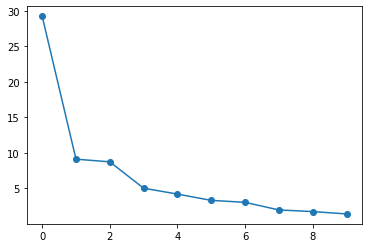

In [69]:
# Effective rank is ~8
plt.plot(pca.singular_values_, marker="o")

In [70]:
proj.shape

(2335, 10)

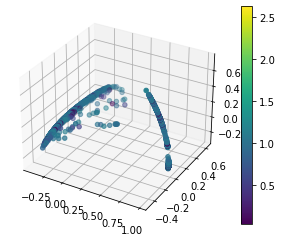

In [71]:
show_scatter(proj[:, :3], inhibition)

In [72]:
plot_scatter(proj[:, :3], {"inhibition": inhibition}, "inhibition")

In [52]:
# Use for unnormalized
mask = proj[:, :3].max(axis=1) < 1e11 * 0.1

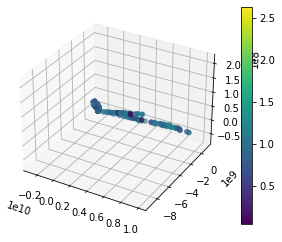

In [53]:
show_scatter(proj[:, :3][mask], inhibition[mask])

(array([2.295e+03, 2.900e+01, 5.000e+00, 4.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-2.83751068e+09,  2.68122310e+10,  5.64619727e+10,  8.61117145e+10,
         1.15761456e+11,  1.45411198e+11,  1.75060940e+11,  2.04710681e+11,
         2.34360423e+11,  2.64010165e+11,  2.93659906e+11]),
 <BarContainer object of 10 artists>)

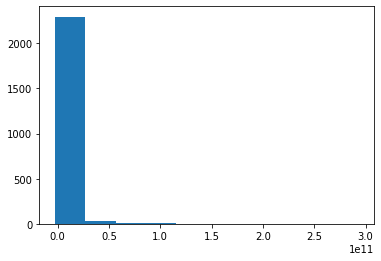

In [31]:
plt.hist(proj[:, 0])

(array([1.000e+00, 6.000e+00, 3.160e+02, 2.003e+03, 7.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-1.87215396e+10, -1.33744420e+10, -8.02734438e+09, -2.68024678e+09,
         2.66685081e+09,  8.01394840e+09,  1.33610460e+10,  1.87081436e+10,
         2.40552412e+10,  2.94023388e+10,  3.47494364e+10]),
 <BarContainer object of 10 artists>)

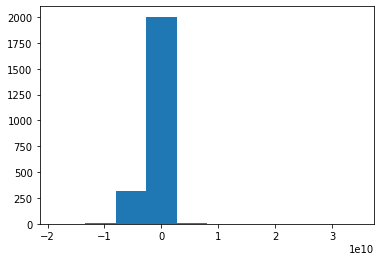

In [32]:
plt.hist(proj[:, 1])

(array([2.334e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-6.83929998e+08,  7.92262790e+09,  1.65291858e+10,  2.51357437e+10,
         3.37423016e+10,  4.23488595e+10,  5.09554174e+10,  5.95619753e+10,
         6.81685332e+10,  7.67750911e+10,  8.53816490e+10]),
 <BarContainer object of 10 artists>)

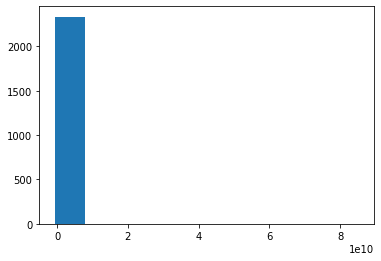

In [33]:
plt.hist(proj[:, 2])

In [54]:
plot_scatter(proj[:, :3][mask], {"inhibition": inhibition[mask]}, "inhibition")